# 각 구별 승하차 top20개 정류소 추출

In [315]:
from utils import *
Bus_Route_Info=call_dataframe("Bus_Route_Info")
final_tb_infra_population=call_dataframe_final("`final_tb_infra_population`")
bus_station_XY_final=call_dataframe_final("`bus_station_XY_final`")
total_bus_time = call_dataframe("`total_bus_time`")

컬럼명 :  ['ROUTE_ID', '노선명', '순번', 'NODE_ID', 'ARS_ID', '정류소명', 'X좌표', 'Y좌표']
컬럼명 :  ['NODE_ID', '정류소명', 'X좌표', 'Y좌표', '법정동코드', '법정동_구', '법정동', 'academy_cnt', 'kindergarten_cnt', 'mart_cnt', 'restaurant_cnt', 'school_cnt', 'university_cnt', 'subway_cnt', 'tour_cnt', 'cafe_cnt', 'hospital_cnt', 'culture_cnt', 'univ_hospital_cnt', 'public_office_cnt', 'employee_cnt', 'alone_ratio', 'emp_corp_ratio', 'population_15to64', 'RIDE_SUM_6_10', 'ALIGHT_SUM_6_10']
컬럼명 :  ['NODE_ID', 'ARS_ID', '정류소명', 'X좌표', 'Y좌표', '법정동코드', '법정동_구', '법정동', '행정동코드', '행정동']
컬럼명 :  ['USE_MON', 'SIX_RIDE_NUM', 'SEVEN_RIDE_NUM', 'EIGHT_RIDE_NUM', 'NINE_RIDE_NUM', '전체 탑승자수', 'ride_rate_06_07', 'ride_rate_07_08', 'ride_rate_08_09', 'ride_rate_09_10', 'SIX_ALIGHT_NUM', 'SEVEN_ALIGHT_NUM', 'EIGHT_ALIGHT_NUM', 'NINE_ALIGHT_NUM', '하차인원 수', 'alight_rate_06_07', 'alight_rate_07_08', 'alight_rate_08_09', 'alight_rate_09_10', '월별_노선_정류장_ID', 'ROUTE_ID', 'NODE_ID']


In [316]:
# 승차
locals =["강남구","강동구","강북구","강서구","관악구","광진구","구로구","금천구","노원구","도봉구","동대문구","동작구","마포구",
         "서대문구","서초구","성동구","성북구","송파구","양천구","영등포구","용산구","은평구","종로구","중구","중랑구"]
for i in locals:
    globals()["top_20_" + i] = final_tb_infra_population[final_tb_infra_population["법정동_구"]==i].sort_values(by="RIDE_SUM_6_10", ascending=False)[:20]

In [317]:
locals_on_top_20= []
for i in locals:
    locals_on_top_20.append("top_20_"+i)
    
import pandas as pd
locals_bus_on_top_20_df=pd.DataFrame()
for i in locals_on_top_20:
    locals_bus_on_top_20_df=pd.concat([locals_bus_on_top_20_df,eval(i)],axis=0)

In [318]:
locals_bus_on_top_20_df

,NODE_ID,정류소명,X좌표,Y좌표,법정동코드,법정동_구,법정동,academy_cnt,kindergarten_cnt,mart_cnt,...,hospital_cnt,culture_cnt,univ_hospital_cnt,public_office_cnt,employee_cnt,alone_ratio,emp_corp_ratio,population_15to64,RIDE_SUM_6_10,ALIGHT_SUM_6_10
800,121000012,지하철2호선강남역,127.02637,37.500785,1168010100,강남구,역삼동,303,10,1,...,484,14,0,1,225357,0.263555,7.381010,52862,918850,432809
11353,122000156,선릉역,127.0504623,37.5047612,1168010600,강남구,대치동,235,5,0,...,134,4,0,1,118600,0.086042,8.916623,61275,868377,440136
11261,122000301,수서역,127.1019667,37.48687712,1168011500,강남구,수서동,9,9,2,...,32,0,0,3,27696,0.147954,8.436186,22544,730525,365257
11295,122000076,강남구청역,127.0410138,37.51830065,1168010400,강남구,청담동,118,6,1,...,101,11,0,1,46756,0.132366,6.182203,17857,663733,183293
11177,122000089,봉은사역3번출구.삼성1파출소,127.0601629,37.51510797,1168010500,강남구,삼성동,16,5,2,...,24,42,0,2,121663,0.143385,8.690214,29249,642163,262354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2577,106000159,지하철7호선중화역3번출구,127.0789975,37.60145047,1126010300,중랑구,중화동,81,10,2,...,42,0,0,4,10700,0.179255,2.886431,32217,234778,256258
2613,106000433,우림시장.망우사거리,127.098635,37.599565,1126010500,중랑구,망우동,77,19,0,...,59,0,0,3,15969,0.165368,3.291220,32659,224701,114375
2794,106000460,새솔초등학교입구,127.109803,37.6172677,1126010600,중랑구,신내동,10,9,0,...,2,0,0,1,18639,0.080124,5.051220,40878,222725,4758
2726,106000325,먹골역,127.0778547,37.60893655,1126010400,중랑구,묵동,58,16,2,...,40,0,0,3,10928,0.130204,2.799898,37891,219632,66887


In [319]:
locals_bus_on_top_20_df.to_csv("locals_bus_on_top_20_df")

In [320]:
# 하차
locals =["강남구","강동구","강북구","강서구","관악구","광진구","구로구","금천구","노원구","도봉구","동대문구","동작구","마포구",
         "서대문구","서초구","성동구","성북구","송파구","양천구","영등포구","용산구","은평구","종로구","중구","중랑구"]
for i in locals:
    globals()["top_20_" + i] = final_tb_infra_population[final_tb_infra_population["법정동_구"]==i].sort_values(by="ALIGHT_SUM_6_10", ascending=False)[:20]
    
locals_off_top_20= []
for i in locals:
    locals_off_top_20.append("top_20_"+i)
    
import pandas as pd
locals_bus_off_top_20_df=pd.DataFrame()
for i in locals_off_top_20:
    locals_bus_off_top_20_df=pd.concat([locals_bus_off_top_20_df,eval(i)],axis=0)

In [321]:
locals_bus_off_top_20_df

,NODE_ID,정류소명,X좌표,Y좌표,법정동코드,법정동_구,법정동,academy_cnt,kindergarten_cnt,mart_cnt,...,hospital_cnt,culture_cnt,univ_hospital_cnt,public_office_cnt,employee_cnt,alone_ratio,emp_corp_ratio,population_15to64,RIDE_SUM_6_10,ALIGHT_SUM_6_10
11354,122000157,포스코빌딩,127.0548888,37.50604938,1168010600,강남구,대치동,237,6,1,...,109,7,0,0,118600,0.086042,8.916623,61275,71234,905842
11174,122000086,봉은사.삼성1파출소앞,127.0594354,37.51496776,1168010500,강남구,삼성동,15,5,2,...,25,42,0,2,121663,0.143385,8.690214,29249,300761,686636
11266,122900002,수서역5번출구.이마트앞,127.1026711,37.48678908,1168011500,강남구,수서동,9,9,2,...,32,0,0,3,27696,0.147954,8.436186,22544,49782,675695
11283,122000064,프리마호텔,127.0494314,37.52467091,1168010400,강남구,청담동,37,4,0,...,68,38,0,2,46756,0.132366,6.182203,17857,234844,647590
799,121000010,신분당선강남역,127.029112,37.494993,1168010100,강남구,역삼동,336,8,3,...,314,12,0,4,225357,0.263555,7.381010,52862,479238,523395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2536,106000001,망우역.상봉터미널,127.0911386,37.59782836,1126010200,중랑구,상봉동,30,9,3,...,29,3,0,2,16427,0.180588,3.246443,32452,166779,215893
2482,106000133,지하철7호선면목역,127.088363,37.58839698,1126010100,중랑구,면목동,55,16,1,...,52,0,0,3,33988,0.167066,2.613055,98020,173999,202937
2501,106000153,사가정시장,127.0897951,37.58056002,1126010100,중랑구,면목동,59,18,2,...,79,0,0,2,33988,0.167066,2.613055,98020,15253,200646
2485,106000136,농협앞,127.0919969,37.58944667,1126010100,중랑구,면목동,39,15,0,...,54,0,0,4,33988,0.167066,2.613055,98020,99467,181701


In [322]:
bus_station_XY_final

,NODE_ID,ARS_ID,정류소명,X좌표,Y좌표,법정동코드,법정동_구,법정동,행정동코드,행정동
0,100000001,1001,종로2가사거리,126.987750,37.569765,1111013800,종로구,종로2가,1111061500,종로1.2.3.4가동
1,100000002,1002,창경궁.서울대학교병원,126.996566,37.579183,1111016600,종로구,연건동,1111061500,종로1.2.3.4가동
2,100000003,1003,명륜3가.성대입구,126.998340,37.582671,1111017200,종로구,명륜4가,1111065000,혜화동
3,100000004,1004,종로2가.삼일교,126.987613,37.568579,1111013500,종로구,관철동,1111061500,종로1.2.3.4가동
4,100000005,1005,혜화동로터리.여운형활동터,127.001744,37.586243,1111016900,종로구,혜화동,1111065000,혜화동
...,...,...,...,...,...,...,...,...,...,...
12565,124000334,25995,우성아파트,127.139338,37.550386,1174010900,강동구,천호동,1174060000,천호1동
12566,124000333,25996,우성아파트,127.140046,37.550643,1174010700,강동구,암사동,1174057000,암사1동
12567,124000332,25997,조일약국,127.123596,37.533630,1174010800,강동구,성내동,1174065000,성내2동
12568,124000331,25998,성내시장,127.125497,37.536155,1174010800,강동구,성내동,1174065000,성내2동


In [323]:
Bus_Route_Info

,ROUTE_ID,노선명,순번,NODE_ID,ARS_ID,정류소명,X좌표,Y좌표
0,100100073,470,66,100000001,1001,종로2가사거리,126.987750,37.569765
1,100100585,N37,32,100000001,1001,종로2가사거리,126.987750,37.569765
2,123000010,741,77,100000001,1001,종로2가사거리,126.987750,37.569765
3,100100007,102,31,100000002,1002,창경궁.서울대학교병원,126.996566,37.579183
4,100100009,104,23,100000002,1002,창경궁.서울대학교병원,126.996566,37.579183
...,...,...,...,...,...,...,...,...
46407,100100402,9709,121,277103898,63629,조리사거리(경유),126.801589,37.747464
46408,100100551,673,84,277104249,15452,고강지하차도입구(경유),126.815691,37.537815
46409,100100551,673,26,277104250,15451,고강지하차도입구(경유),126.815765,37.537420
46410,100100551,673,85,277104251,15453,원종IC(경유),126.805608,37.533829


In [324]:
Bus_Route_Info[Bus_Route_Info["노선명"]=="8221"]

,ROUTE_ID,노선명,순번,NODE_ID,ARS_ID,정류소명,X좌표,Y좌표
6458,106000001,8221,9,105000059,6145,전곡시장앞,127.067795,37.577237
6465,106000001,8221,10,105000061,6147,답십리촬영소.우성그린아파트,127.066930,37.574353
6477,106000001,8221,12,105000064,6150,동답한신동아아파트,127.064217,37.569746
6490,106000001,8221,13,105000067,6153,동아.위더스빌아파트,127.061465,37.566159
6504,106000001,8221,14,105000071,6157,고미술상가,127.057518,37.563532
6508,106000001,8221,15,105000072,6158,답십리역.동부시장,127.052519,37.567256
6820,106000001,8221,1,105000127,6213,장안2동주민센터,127.070373,37.578608
6911,106000001,8221,2,105000151,6237,장안동근린공원,127.071954,37.577324
6918,106000001,8221,3,105000153,6239,동대문더퍼스트데시앙아파트,127.071814,37.575354
6925,106000001,8221,4,105000155,6241,코리아병원,127.071660,37.573207


In [325]:
노선명=["8771","8761","8551","8552","8221","8441","8331"]
다람쥐버스 = []
for k in 노선명:
    globals()["route_"+k] = Bus_Route_Info[Bus_Route_Info["노선명"]==k].sort_values(by="순번")
    다람쥐버스.append("route_"+k)

In [326]:
다람쥐버스

['route_8771',
 'route_8761',
 'route_8551',
 'route_8552',
 'route_8221',
 'route_8441',
 'route_8331']

In [327]:
route_8771

,ROUTE_ID,노선명,순번,NODE_ID,ARS_ID,정류소명,X좌표,Y좌표
16253,111000009,8771,1,111000128,12216,구산중학교.구산교회,126.910834,37.608802
16259,111000009,8771,2,111000129,12217,시립서북병원세현교회앞,126.910460,37.606017
16265,111000009,8771,3,111000130,12218,서울기독대학교입구,126.910227,37.602032
16271,111000009,8771,4,111000131,12219,우남교통,126.910125,37.599767
16275,111000009,8771,5,111000132,12220,신사동고개.은평지역자활센터,126.910067,37.598601
15761,111000009,8771,6,111000043,12131,응암역신사오거리,126.914989,37.598759
15765,111000009,8771,7,111000044,12132,신진과학기술고교.이마트은평점,126.918630,37.599538
15772,111000009,8771,8,111000045,12133,본서부병원,126.923579,37.600550
15779,111000009,8771,9,111000046,12134,은평세무서,126.926653,37.601222
15791,111000009,8771,10,111000047,12135,은평구청,126.930298,37.601162


In [328]:
람쥐_NODE_ID=[]
for i in 다람쥐버스:
    람쥐_NODE_ID=람쥐_NODE_ID+eval(i)["NODE_ID"].tolist()
    
다람쥐_NODE_ID=[]
for i in 람쥐_NODE_ID:
    다람쥐_NODE_ID.append(str(i))
    
다람쥐_station_infra = final_tb_infra_population.loc[final_tb_infra_population["NODE_ID"].isin(다람쥐_NODE_ID),:]

In [329]:
다람쥐_station_infra["NODE_ID"]=다람쥐_station_infra["NODE_ID"].astype("int64")

/var/folders/dj/074406ws2d7f7vkzzjkhcfp80000gn/T/ipykernel_52417/3828484329.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  다람쥐_station_infra["NODE_ID"]=다람쥐_station_infra["NODE_ID"].astype("int64")


# 다람쥐 버스 정류장들과 전체 정류장의 평균을 비교

In [330]:
다람쥐_station_infra.describe()

,NODE_ID,academy_cnt,kindergarten_cnt,mart_cnt,restaurant_cnt,school_cnt,university_cnt,subway_cnt,tour_cnt,cafe_cnt,hospital_cnt,culture_cnt,univ_hospital_cnt,public_office_cnt,employee_cnt,alone_ratio,emp_corp_ratio,population_15to64,RIDE_SUM_6_10,ALIGHT_SUM_6_10
count,9.500000e+01,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,9.500000e+01
mean,1.166212e+08,67.768421,15.442105,1.326316,270.221053,2.400000,0.315789,0.578947,1.084211,59.294737,33.305263,1.810526,0.042105,2.600000,33984.368421,0.167910,4.206860,65695.010526,207574.042105,2.155565e+05
std,6.209476e+06,42.926075,6.753590,1.105519,185.215871,1.652851,0.467295,0.708294,2.127146,43.948682,19.519806,3.612316,0.201895,1.835814,35539.088738,0.069220,2.135197,61102.402124,145317.718151,3.830501e+05
min,1.050001e+08,1.000000,0.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2191.000000,0.034599,2.643029,3717.000000,15288.000000,8.797000e+03
25%,1.110001e+08,34.000000,10.000000,0.500000,157.000000,1.000000,0.000000,0.000000,0.000000,32.500000,18.500000,0.000000,0.000000,1.000000,11158.000000,0.119006,3.160732,21679.000000,105005.000000,4.125150e+04
50%,1.190001e+08,60.000000,15.000000,1.000000,213.000000,2.000000,0.000000,0.000000,0.000000,48.000000,35.000000,1.000000,0.000000,2.000000,20188.000000,0.136672,3.528780,43934.000000,167439.000000,6.929900e+04
75%,1.210004e+08,94.500000,21.000000,2.000000,364.500000,3.500000,1.000000,1.000000,1.000000,76.000000,46.000000,2.000000,0.000000,4.000000,59562.000000,0.219602,4.338670,74316.000000,280306.000000,1.820320e+05
max,1.230006e+08,159.000000,31.000000,4.000000,1005.000000,9.000000,1.000000,2.000000,14.000000,255.000000,88.000000,26.000000,1.000000,7.000000,171415.000000,0.328415,15.536977,182596.000000,814284.000000,2.172729e+06


In [331]:
final_tb_infra_population.describe()

,academy_cnt,kindergarten_cnt,mart_cnt,restaurant_cnt,school_cnt,university_cnt,subway_cnt,tour_cnt,cafe_cnt,hospital_cnt,culture_cnt,univ_hospital_cnt,public_office_cnt,employee_cnt,alone_ratio,emp_corp_ratio,population_15to64,RIDE_SUM_6_10,ALIGHT_SUM_6_10
count,12548.000000,12548.000000,12548.000000,12548.000000,12548.000000,12548.000000,12548.000000,12548.000000,12548.000000,12548.000000,12548.000000,12548.000000,12548.000000,12548.000000,12548.000000,12548.000000,12548.000000,1.254800e+04,1.254800e+04
mean,58.972824,12.436245,0.969876,264.399347,2.606312,0.279646,0.779168,1.275582,65.034826,33.303236,4.762273,0.069812,2.708240,33519.212942,0.160322,4.679608,47221.663293,6.165521e+04,5.982146e+04
std,58.397895,7.027619,0.993588,231.068810,1.909175,0.576203,0.936796,2.297736,68.035116,39.170344,12.287339,0.256710,3.162112,42587.599741,0.077188,2.198907,42745.747224,9.220154e+04,1.148750e+05
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,652.000000,0.034599,1.977966,70.000000,0.000000e+00,0.000000e+00
25%,25.000000,7.000000,0.000000,98.000000,1.000000,0.000000,0.000000,0.000000,24.000000,11.000000,0.000000,0.000000,1.000000,9567.000000,0.108151,3.280455,16762.000000,8.032750e+03,7.341500e+03
50%,46.000000,12.000000,1.000000,206.000000,2.000000,0.000000,1.000000,1.000000,45.000000,25.000000,1.000000,0.000000,2.000000,18657.000000,0.144275,3.902886,34997.000000,3.549350e+04,2.895950e+04
75%,74.000000,17.000000,2.000000,360.000000,4.000000,0.000000,1.000000,2.000000,80.000000,44.000000,4.000000,0.000000,3.000000,40715.000000,0.182004,5.434933,62587.000000,6.207525e+04,5.981500e+04
max,866.000000,46.000000,6.000000,1682.000000,12.000000,3.000000,6.000000,37.000000,618.000000,496.000000,199.000000,2.000000,38.000000,225357.000000,0.525219,16.240483,182596.000000,1.548550e+06,3.354660e+06


In [333]:
다람쥐_station_infra.columns

Index(['NODE_ID', '정류소명', 'X좌표', 'Y좌표', '법정동코드', '법정동_구', '법정동', 'academy_cnt',
       'kindergarten_cnt', 'mart_cnt', 'restaurant_cnt', 'school_cnt',
       'university_cnt', 'subway_cnt', 'tour_cnt', 'cafe_cnt', 'hospital_cnt',
       'culture_cnt', 'univ_hospital_cnt', 'public_office_cnt', 'employee_cnt',
       'alone_ratio', 'emp_corp_ratio', 'population_15to64', 'RIDE_SUM_6_10',
       'ALIGHT_SUM_6_10'],
      dtype='object')

In [334]:
다람쥐_station_infra_describe = 다람쥐_station_infra.describe()[['academy_cnt',
       'kindergarten_cnt', 'mart_cnt', 'restaurant_cnt', 'school_cnt',
       'university_cnt', 'subway_cnt', 'tour_cnt', 'cafe_cnt', 'hospital_cnt',
       'culture_cnt', 'univ_hospital_cnt', 'public_office_cnt', 'employee_cnt',
       'alone_ratio', 'emp_corp_ratio', 'population_15to64', 'RIDE_SUM_6_10',
       'ALIGHT_SUM_6_10']]
final_tb_infra_population_describe = final_tb_infra_population.describe()

In [335]:
a = pd.DataFrame(final_tb_infra_population_describe.loc["mean",:])
b = pd.DataFrame(다람쥐_station_infra_describe.loc["mean",:])


In [336]:
a.rename(columns={"mean":"total_mean"},inplace=True)
b.rename(columns={"mean":"다람쥐_mean"},inplace=True)

In [337]:
ad = pd.concat([a,b],axis=1)

In [338]:
ad

,total_mean,다람쥐_mean
academy_cnt,58.972824,67.768421
kindergarten_cnt,12.436245,15.442105
mart_cnt,0.969876,1.326316
restaurant_cnt,264.399347,270.221053
school_cnt,2.606312,2.400000
university_cnt,0.279646,0.315789
subway_cnt,0.779168,0.578947
tour_cnt,1.275582,1.084211
cafe_cnt,65.034826,59.294737
hospital_cnt,33.303236,33.305263


In [339]:
ax = tb_ride.plot.bar(rot=90, figsize=(20, 8))  # Adjust the figsize as per your desired size

# Setting the row axis label
ax.set_xticklabels(tb_ride['구'])
ax.set_title('구별 6-10am 승하차 평균(버스,지하철)')

plt.show()  # Show the plot

NameError: name 'tb_ride' is not defined

<Figure size 1500x800 with 0 Axes>

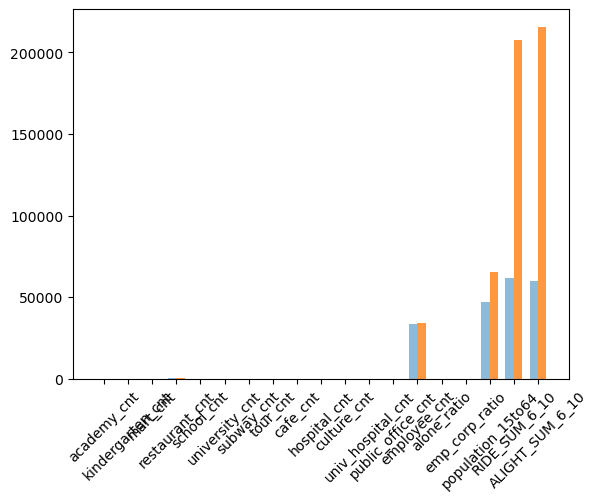

In [340]:
# 스케일링 전
import numpy as np
import matplotlib.pyplot as plt

x_label = ad.index.tolist()
x = np.arange(len(x_label))
plt.figure(figsize=(15, 8))

# 넓이 지정
width = 0.35

fig, axes = plt.subplots()

axes.bar(x - width/2, ad["total_mean"],width, align='center', alpha=0.5)
axes.bar(x + width/2, ad["다람쥐_mean"], width, align='center', alpha=0.8)

# xticks 설정
plt.xticks(x)
axes.set_xticklabels(x_label)
plt.xticks(rotation=45)

plt.show()

<Figure size 1500x800 with 0 Axes>

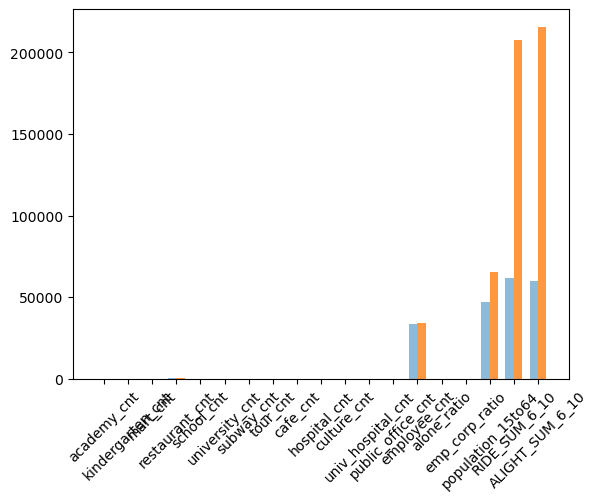

In [341]:
# 로그 스케일링 후
import numpy as np
import matplotlib.pyplot as plt

x_label = ad.index.tolist()
x = np.arange(len(x_label))
plt.figure(figsize=(15, 8))


# 넓이 지정
width = 0.35

fig, axes = plt.subplots()

axes.bar(x - width/2, ad["total_mean"],width, align='center', alpha=0.5)
axes.bar(x + width/2, ad["다람쥐_mean"], width, align='center', alpha=0.8)

# xticks 설정
plt.xticks(x)
axes.set_xticklabels(x_label)
plt.xticks(rotation=45)


plt.show()

In [342]:
# minmax 스케일링
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
fitted = min_max_scaler.fit(ad)
print(fitted.data_max_)

[ 61655.21326108 215556.45263158]


In [343]:
output = min_max_scaler.transform(ad)
minmax_output = pd.DataFrame(output, columns=ad.columns, index=list(ad.index.values))
print(minmax_output.head())

                  total_mean  다람쥐_mean
academy_cnt         0.000955  0.000314
kindergarten_cnt    0.000201  0.000071
mart_cnt            0.000015  0.000006
restaurant_cnt      0.004287  0.001253
school_cnt          0.000041  0.000011


<Figure size 1500x800 with 0 Axes>

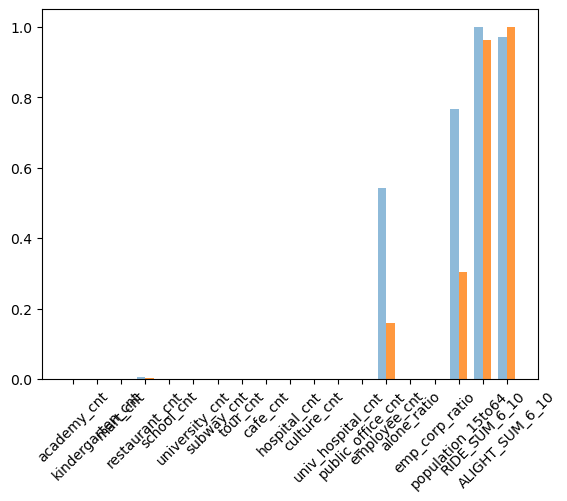

In [344]:
# 로그 스케일링 후
import numpy as np
import matplotlib.pyplot as plt

x_label = ad.index.tolist()
x = np.arange(len(x_label))
plt.figure(figsize=(15, 8))


# 넓이 지정
width = 0.35

fig, axes = plt.subplots()

axes.bar(x - width/2, minmax_output["total_mean"],width, align='center', alpha=0.5)
axes.bar(x + width/2, minmax_output["다람쥐_mean"], width, align='center', alpha=0.8)

# xticks 설정
plt.xticks(x)
axes.set_xticklabels(x_label)
plt.xticks(rotation=45)


plt.show()

In [345]:
# standardization
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

fitted = std_scaler.fit(ad)
print(fitted.mean_)
## 출력 결과
## array([4.46000000e+02, 3.83838384e-01, 2.30864198e+00, 2.93615825e+01,
##        5.23007856e-01, 3.81593715e-01, 3.22042080e+01])
output = std_scaler.transform(ad)
stand_output = pd.DataFrame(output, columns=ad.columns, index=list(ad.index.values))
print(stand_output.head())

[10666.84146538 27540.54936462]
                  total_mean  다람쥐_mean
academy_cnt        -0.499429 -0.421776
kindergarten_cnt   -0.501619 -0.422579
mart_cnt           -0.502159 -0.422796
restaurant_cnt     -0.489757 -0.418668
school_cnt         -0.502082 -0.422779


<Figure size 1500x800 with 0 Axes>

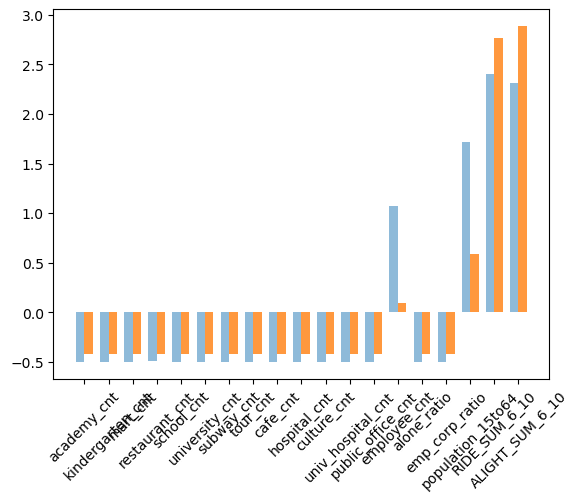

In [346]:
# 로그 스케일링 후
import numpy as np
import matplotlib.pyplot as plt

x_label = ad.index.tolist()
x = np.arange(len(x_label))
plt.figure(figsize=(15, 8))


# 넓이 지정
width = 0.35

fig, axes = plt.subplots()

axes.bar(x - width/2, stand_output["total_mean"],width, align='center', alpha=0.5)
axes.bar(x + width/2, stand_output["다람쥐_mean"], width, align='center', alpha=0.8)

# xticks 설정
plt.xticks(x)
axes.set_xticklabels(x_label)
plt.xticks(rotation=45)


plt.show()

# 다람쥐 버스 노선의 시작과 종점 추출 

In [347]:
다람쥐_station_infra

,NODE_ID,정류소명,X좌표,Y좌표,법정동코드,법정동_구,법정동,academy_cnt,kindergarten_cnt,mart_cnt,...,hospital_cnt,culture_cnt,univ_hospital_cnt,public_office_cnt,employee_cnt,alone_ratio,emp_corp_ratio,population_15to64,RIDE_SUM_6_10,ALIGHT_SUM_6_10
2065,105000061,답십리촬영소.우성그린아파트,127.0669298,37.57435317,1123010500,동대문구,답십리동,58,19,1,...,50,2,0,0,18996,0.129167,3.160732,40211,167439,65658
2066,105000064,동답한신동아아파트,127.0642166,37.56974649,1123010500,동대문구,답십리동,34,15,1,...,20,2,0,4,18996,0.129167,3.160732,40211,285028,66170
2067,105000067,동아.위더스빌아파트,127.061465,37.56615891,1123010500,동대문구,답십리동,34,11,1,...,25,0,0,6,18996,0.129167,3.160732,40211,175854,110733
2068,105000072,답십리역.동부시장,127.0525194,37.56725625,1123010500,동대문구,답십리동,42,10,1,...,55,0,0,4,18996,0.129167,3.160732,40211,183547,700651
2107,105000489,동답초교.대림아파트,127.0651585,37.57110482,1123010500,동대문구,답십리동,42,12,0,...,27,2,0,2,18996,0.129167,3.160732,40211,169604,84867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12111,123000125,송파나루역,127.1116742,37.51067944,1171011100,송파구,방이동,47,21,0,...,41,1,0,0,39332,0.145319,5.071825,43934,134790,117240
12112,123000126,송파구청.방이맛골,127.1078273,37.51318447,1171011100,송파구,방이동,32,7,1,...,46,11,0,3,39332,0.145319,5.071825,43934,107112,471058
12117,123000131,방이우체국,127.1139246,37.50951307,1171011100,송파구,방이동,70,22,2,...,49,1,0,0,39332,0.145319,5.071825,43934,153889,100564
12121,123000135,한양삼익아파트,127.1216254,37.50595145,1171011100,송파구,방이동,143,16,4,...,36,1,0,0,39332,0.145319,5.071825,43934,315463,131084


In [348]:
다람쥐버스

['route_8771',
 'route_8761',
 'route_8551',
 'route_8552',
 'route_8221',
 'route_8441',
 'route_8331']

In [349]:
start_station = pd.DataFrame()
end_station = pd.DataFrame()
for i in 다람쥐버스:
    start_station=pd.concat([start_station,eval(i).head(1)],axis=0)
    end_station=pd.concat([end_station,eval(i).tail(1)],axis=0)

In [350]:
start_station

,ROUTE_ID,노선명,순번,NODE_ID,ARS_ID,정류소명,X좌표,Y좌표
16253,111000009,8771,1,111000128,12216,구산중학교.구산교회,126.910834,37.608802
19899,113000001,8761,1,113000113,14204,신촌로터리,126.934833,37.554029
32438,108000001,8551,1,120000156,21258,봉천역,126.942083,37.483022
32256,116000001,8552,1,120000109,21211,신림복지관앞,126.919677,37.465282
6820,106000001,8221,1,105000127,6213,장안2동주민센터,127.070373,37.578608
37236,103000001,8441,1,122000305,23412,은곡마을.LH이편한세상,127.102634,37.465528
39198,124000010,8331,1,123000209,24299,마천동사거리,127.146715,37.498640


In [351]:
end_station

,ROUTE_ID,노선명,순번,NODE_ID,ARS_ID,정류소명,X좌표,Y좌표
16615,111000009,8771,11,111000291,12381,녹번역,126.934337,37.600793
19886,113000001,8761,9,113000111,14202,창전현대홈타운,126.932651,37.550665
31378,108000001,8551,24,120000007,21106,봉천역.관악초등학교,126.943335,37.482367
31524,116000001,8552,12,120000018,21117,신림사거리.신림역,126.928063,37.483818
6508,106000001,8221,15,105000072,6158,답십리역.동부시장,127.052519,37.567256
37213,103000001,8441,10,122000302,23409,수서역5번출구,127.102457,37.486964
38361,124000010,8331,14,123000043,24132,잠실역8번출구,127.101460,37.513912


In [352]:
# 다람쥐 버스 시작 정류장 인프라 데이터 모음
람쥐_start_NODE_ID= start_station["NODE_ID"].tolist()
    
다람쥐_start_NODE_ID=[]
for i in 람쥐_start_NODE_ID:
    다람쥐_start_NODE_ID.append(str(i))
    
다람쥐_start_station_infra = final_tb_infra_population.loc[final_tb_infra_population["NODE_ID"].isin(다람쥐_start_NODE_ID),:]
다람쥐_start_station_infra

,NODE_ID,정류소명,X좌표,Y좌표,법정동코드,법정동_구,법정동,academy_cnt,kindergarten_cnt,mart_cnt,...,hospital_cnt,culture_cnt,univ_hospital_cnt,public_office_cnt,employee_cnt,alone_ratio,emp_corp_ratio,population_15to64,RIDE_SUM_6_10,ALIGHT_SUM_6_10
2122,105000127,장안2동주민센터,127.0703732,37.57860792,1123010600,동대문구,장안동,79,17,3,...,27,0,0,5,36170,0.127863,3.528780,48942,287552,124720
5525,111000128,구산중학교.구산교회,126.9108336,37.6088024,1138010500,은평구,구산동,63,17,0,...,12,0,0,3,6242,0.088836,3.893949,22444,385560,32505
5771,113000113,신촌로터리,126.9348326,37.55402911,1144011000,마포구,노고산동,147,8,3,...,88,26,0,2,23823,0.328415,4.544639,10025,185216,30077
8860,120000109,신림복지관앞,126.9196774,37.46528249,1162010200,관악구,신림동,12,10,0,...,4,0,0,2,61140,0.288663,3.375476,182596,158274,8797
10422,120000156,봉천역,126.9420825,37.48302172,1162010100,관악구,봉천동,98,23,2,...,52,1,0,4,61570,0.258852,3.828980,170048,49721,138870
11553,122000305,은곡마을.LH이편한세상,127.1026344,37.46552792,1168011100,강남구,세곡동,27,12,4,...,19,0,0,1,3523,0.115202,4.338670,9767,182815,59304
12015,123000209,마천동사거리,127.1467148,37.49864025,1171011400,송파구,마천동,35,24,2,...,45,0,0,5,7261,0.126083,2.676373,26152,250869,64133


In [353]:
# 다람쥐 버스 종점 정류장 인프라 데이터 모음
람쥐_end_NODE_ID= end_station["NODE_ID"].tolist()
    
다람쥐_end_NODE_ID=[]
for i in 람쥐_end_NODE_ID:
    다람쥐_end_NODE_ID.append(str(i))
    
다람쥐_end_station_infra = final_tb_infra_population.loc[final_tb_infra_population["NODE_ID"].isin(다람쥐_end_NODE_ID),:]
다람쥐_end_station_infra

,NODE_ID,정류소명,X좌표,Y좌표,법정동코드,법정동_구,법정동,academy_cnt,kindergarten_cnt,mart_cnt,...,hospital_cnt,culture_cnt,univ_hospital_cnt,public_office_cnt,employee_cnt,alone_ratio,emp_corp_ratio,population_15to64,RIDE_SUM_6_10,ALIGHT_SUM_6_10
2068,105000072,답십리역.동부시장,127.0525194,37.56725625,1123010500,동대문구,답십리동,42,10,1,...,55,0,0,4,18996,0.129167,3.160732,40211,183547,700651
5329,111000291,녹번역,126.9343371,37.60079255,1138010700,은평구,응암동,42,16,1,...,33,0,0,2,17706,0.136672,3.028738,53938,274899,1424706
6510,113000111,창전현대홈타운,126.9326512,37.550665,1144011400,마포구,창전동,86,9,2,...,27,7,0,6,2191,0.182158,3.976407,3717,37418,38177
8816,120000018,신림사거리.신림역,126.9280626,37.4838178,1162010200,관악구,신림동,55,4,1,...,84,4,0,4,61140,0.288663,3.375476,182596,293209,2083206
10356,120000007,봉천역.관악초등학교,126.9433348,37.48236723,1162010100,관악구,봉천동,96,23,1,...,47,1,0,4,61570,0.258852,3.828980,170048,249048,435149
11262,122000302,수서역5번출구,127.1024566,37.4869636,1168011500,강남구,수서동,9,9,2,...,32,0,0,3,27696,0.147954,8.436186,22544,36749,403530
11732,123000043,잠실역8번출구,127.1014595,37.51391189,1171010200,송파구,신천동,67,9,4,...,77,18,0,4,57984,0.034599,15.536977,24716,132952,1374026


In [354]:
다람쥐_start_station_infra_describe = 다람쥐_start_station_infra.describe()
다람쥐_end_station_infra_describe = 다람쥐_end_station_infra.describe()

다람쥐_start_station_infra_describe = pd.DataFrame(다람쥐_start_station_infra_describe.loc["mean",:])
다람쥐_end_station_infra_describe = pd.DataFrame(다람쥐_end_station_infra_describe.loc["mean",:])

다람쥐_start_station_infra_describe.rename(columns={"mean":"start_mean"},inplace=True)
다람쥐_end_station_infra_describe.rename(columns={"mean":"end_mean"},inplace=True)

In [355]:
다람쥐_star_end_df = pd.concat([다람쥐_start_station_infra_describe,다람쥐_end_station_infra_describe],axis=1)

In [356]:
다람쥐_star_end_df

,start_mean,end_mean
academy_cnt,65.857143,56.714286
kindergarten_cnt,15.857143,11.428571
mart_cnt,2.000000,1.714286
restaurant_cnt,316.857143,437.000000
school_cnt,3.714286,1.714286
university_cnt,0.142857,0.142857
subway_cnt,0.428571,1.571429
tour_cnt,1.000000,2.714286
cafe_cnt,72.428571,97.142857
hospital_cnt,35.285714,50.714286


In [357]:
total = pd.concat([ad,다람쥐_star_end_df],axis=1)

In [358]:
total

,total_mean,다람쥐_mean,start_mean,end_mean
academy_cnt,58.972824,67.768421,65.857143,56.714286
kindergarten_cnt,12.436245,15.442105,15.857143,11.428571
mart_cnt,0.969876,1.326316,2.000000,1.714286
restaurant_cnt,264.399347,270.221053,316.857143,437.000000
school_cnt,2.606312,2.400000,3.714286,1.714286
university_cnt,0.279646,0.315789,0.142857,0.142857
subway_cnt,0.779168,0.578947,0.428571,1.571429
tour_cnt,1.275582,1.084211,1.000000,2.714286
cafe_cnt,65.034826,59.294737,72.428571,97.142857
hospital_cnt,33.303236,33.305263,35.285714,50.714286


<Figure size 1500x800 with 0 Axes>

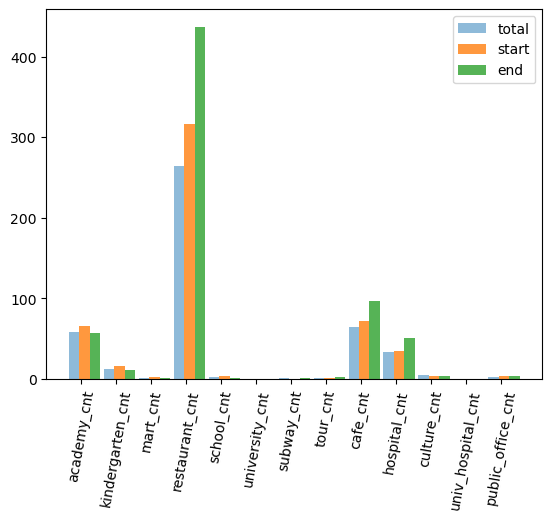

In [362]:
# 다람쥐 버스 전체, 시작, 종점 평균 비교 
# 인프라
import numpy as np
import matplotlib.pyplot as plt

x_label = total.index.tolist()[:13]
x = np.arange(len(x_label))
plt.figure(figsize=(15, 8))

# 넓이 지정
width = 0.3

fig, axes = plt.subplots()

axes.bar(x - width*2/3, total["total_mean"][:13],width, align='center', alpha=0.5,label="total")
axes.bar(x + width/3, total["start_mean"][:13], width, align='center', alpha=0.8,label="start")
axes.bar(x + width*4/3, total["end_mean"][:13], width, align='center', alpha=0.8,label="end")

# xticks 설정
plt.xticks(x)
axes.set_xticklabels(x_label)
plt.xticks(rotation=80)

plt.legend()

plt.show()

<Figure size 1500x800 with 0 Axes>

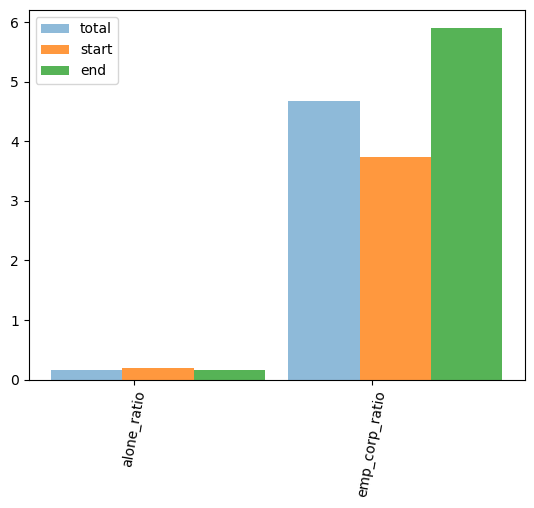

In [364]:
# 다람쥐 버스 전체, 시작, 종점 평균 비교 
# 인구,탑승
import numpy as np
import matplotlib.pyplot as plt

x_label = total.index.tolist()[14:16]
x = np.arange(len(x_label))
plt.figure(figsize=(15, 8))

# 넓이 지정
width = 0.3

fig, axes = plt.subplots()

axes.bar(x - width*2/3, total["total_mean"][14:16],width, align='center', alpha=0.5,label="total")
axes.bar(x + width/3, total["start_mean"][14:16], width, align='center', alpha=0.8,label="start")
axes.bar(x + width*4/3, total["end_mean"][14:16], width, align='center', alpha=0.8,label="end")

# xticks 설정
plt.xticks(x)
axes.set_xticklabels(x_label)
plt.xticks(rotation=80)

plt.legend()

plt.show()

<Figure size 1500x800 with 0 Axes>

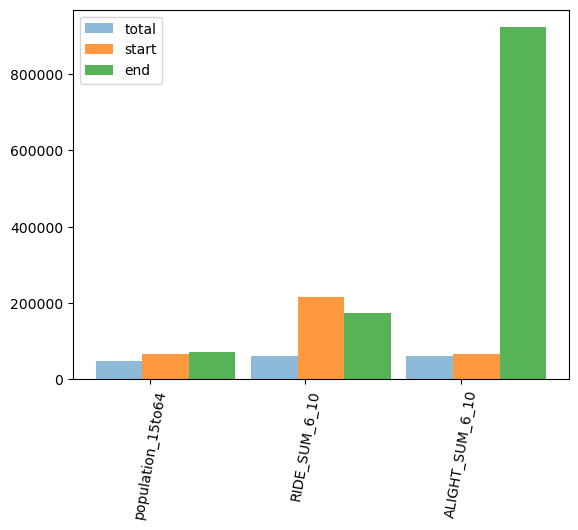

In [365]:
# 다람쥐 버스 전체, 시작, 종점 평균 비교 
# 인구,탑승
import numpy as np
import matplotlib.pyplot as plt

x_label = total.index.tolist()[16:]
x = np.arange(len(x_label))
plt.figure(figsize=(15, 8))

# 넓이 지정
width = 0.3

fig, axes = plt.subplots()

axes.bar(x - width*2/3, total["total_mean"][16:],width, align='center', alpha=0.5,label="total")
axes.bar(x + width/3, total["start_mean"][16:], width, align='center', alpha=0.8,label="start")
axes.bar(x + width*4/3, total["end_mean"][16:], width, align='center', alpha=0.8,label="end")

# xticks 설정
plt.xticks(x)
axes.set_xticklabels(x_label)
plt.xticks(rotation=80)

plt.legend()

plt.show()

# 지하철

In [366]:
tb_subway_month_addr = call_dataframe("`tb_subway_month_addr`")

컬럼명 :  ['호선명', '지하철역', '역사명', '노선명', '시', '구', '동', '법정동코드', '산존재여부', 'X좌표', 'Y좌표', '사용월', '06시-07시 승차인원', '06시-07시 하차인원', '07시-08시 승차인원', '07시-08시 하차인원', '08시-09시 승차인원', '08시-09시 하차인원', '09시-10시 승차인원', '09시-10시 하차인원']


In [374]:
tb_subway_month_addr

,호선명,지하철역,역사명,노선명,시,구,동,법정동코드,산존재여부,X좌표,Y좌표,사용월,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,07시-08시 하차인원,08시-09시 승차인원,08시-09시 하차인원,09시-10시 승차인원,09시-10시 하차인원
0,1호선,동대문,동대문,1호선,서울,종로구,창신동,1111017400,N,127.011167,37.571778,202212,8505,5809,13440,10380,18824,19859,18641,21156
1,1호선,동대문,동대문,1호선,서울,종로구,창신동,1111017400,N,127.011167,37.571778,202211,8782,6391,14368,11493,20005,21825,18561,22349
2,1호선,동대문,동대문,1호선,서울,종로구,창신동,1111017400,N,127.011167,37.571778,202210,9398,6871,14707,11779,19432,21691,18853,22784
3,1호선,동대문,동대문,1호선,서울,종로구,창신동,1111017400,N,127.011167,37.571778,202209,8595,6719,14334,11657,18660,20880,17495,20478
4,1호선,동대문,동대문,1호선,서울,종로구,창신동,1111017400,N,127.011167,37.571778,202208,8375,6305,13390,11046,17632,20315,16633,19979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12859,우이신설선,화계,화계,우이신설선,서울,강북구,수유동,1130510300,N,127.017298,37.633930,202105,3775,1435,10942,1977,13108,4426,7771,3503
12860,우이신설선,화계,화계,우이신설선,서울,강북구,수유동,1130510300,N,127.017298,37.633930,202104,3812,1272,12217,2000,14004,4371,7846,3267
12861,우이신설선,화계,화계,우이신설선,서울,강북구,수유동,1130510300,N,127.017298,37.633930,202103,3802,1390,12396,2043,13918,4234,7766,3287
12862,우이신설선,화계,화계,우이신설선,서울,강북구,수유동,1130510300,N,127.017298,37.633930,202102,2659,1148,9142,1253,10951,3230,6374,2767


In [371]:
다람쥐_start_station_infra["X좌표"] = 다람쥐_start_station_infra["X좌표"].astype("float64")

/var/folders/dj/074406ws2d7f7vkzzjkhcfp80000gn/T/ipykernel_52417/711413167.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  다람쥐_start_station_infra["X좌표"] = 다람쥐_start_station_infra["X좌표"].astype("float64")


In [413]:
다람쥐_start_station_infra.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 2122 to 12015
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   NODE_ID            7 non-null      object 
 1   정류소명               7 non-null      object 
 2   X좌표                7 non-null      float64
 3   Y좌표                7 non-null      object 
 4   법정동코드              7 non-null      object 
 5   법정동_구              7 non-null      object 
 6   법정동                7 non-null      object 
 7   academy_cnt        7 non-null      int64  
 8   kindergarten_cnt   7 non-null      int64  
 9   mart_cnt           7 non-null      int64  
 10  restaurant_cnt     7 non-null      int64  
 11  school_cnt         7 non-null      int64  
 12  university_cnt     7 non-null      int64  
 13  subway_cnt         7 non-null      int64  
 14  tour_cnt           7 non-null      int64  
 15  cafe_cnt           7 non-null      int64  
 16  hospital_cnt       7 no

In [414]:
tb_subway_month_addr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12864 entries, 0 to 12863
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   호선명           12864 non-null  object 
 1   지하철역          12864 non-null  object 
 2   역사명           12864 non-null  object 
 3   노선명           12864 non-null  object 
 4   시             12864 non-null  object 
 5   구             12864 non-null  object 
 6   동             12864 non-null  object 
 7   법정동코드         12864 non-null  int64  
 8   산존재여부         12864 non-null  object 
 9   X좌표           12864 non-null  float64
 10  Y좌표           12864 non-null  float64
 11  사용월           12864 non-null  int64  
 12  06시-07시 승차인원  12864 non-null  int64  
 13  06시-07시 하차인원  12864 non-null  int64  
 14  07시-08시 승차인원  12864 non-null  int64  
 15  07시-08시 하차인원  12864 non-null  int64  
 16  08시-09시 승차인원  12864 non-null  int64  
 17  08시-09시 하차인원  12864 non-null  int64  
 18  09시-10시 승차인원  12864 non-nu

In [427]:
subway_bus_end = pd.DataFrame()
for i in range(len(다람쥐_end_station_infra)):
    subway_bus_end=pd.concat([subway_bus_end,pd.DataFrame(tb_subway_month_addr[float(다람쥐_end_station_infra.iloc[i,:]["X좌표"])<=tb_subway_month_addr["X좌표"]].sort_values(by="X좌표").iloc[0,:])],axis=1)
    subway_bus_end=pd.concat([subway_bus_end,pd.DataFrame(tb_subway_month_addr[float(다람쥐_end_station_infra.iloc[i,:]["X좌표"])>=tb_subway_month_addr["X좌표"]].sort_values(by="X좌표",ascending=False).iloc[0,:])],axis=1)

In [429]:
subway_bus_end = subway_bus_end.transpose()
subway_bus_end

,호선명,지하철역,역사명,노선명,시,구,동,법정동코드,산존재여부,X좌표,Y좌표,사용월,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,07시-08시 하차인원,08시-09시 승차인원,08시-09시 하차인원,09시-10시 승차인원,09시-10시 하차인원
11935,분당선,한티,한티,분당선,서울,강남구,대치동,1168010600,N,127.052882,37.496242,202101,5738,7353,15610,18038,18716,41241,11582,37835
8238,경부선,서동탄,서동탄,경부선,경기,오산시,외삼미동,4137011100,N,127.052134,37.195926,202209,4431,742,10560,1501,3737,1438,2640,791
9452,경의중앙선,서강대,서강대,경의중앙선,서울,마포구,노고산동,1144011000,N,126.934808,37.552705,202111,1436,1355,3118,2788,3840,7959,3156,5519
12071,신림선,서울대벤처타운,서울대벤처타운,신림선,서울,관악구,신림동,1162010200,N,126.93397,37.472091,202205,621,209,1616,425,2062,744,1627,633
4650,6호선,독바위,독바위,6호선,서울,은평구,불광동,1138010300,N,126.93281,37.618399,202212,4769,892,14247,1500,13549,2662,6718,2459
4562,6호선,광흥창,광흥창,6호선,서울,마포구,창전동,1144011400,N,126.931939,37.547486,202204,6842,4595,18525,15300,23971,34681,15733,16881
6156,7호선,신대방삼거리,신대방삼거리,7호선,서울,동작구,대방동,1159010800,N,126.928223,37.499722,202201,16689,5005,45771,11175,72567,26907,40424,17498
12016,신림선,당곡,당곡,신림선,서울,관악구,봉천동,1162010100,N,126.927718,37.489891,202212,3786,999,11100,3038,16559,7774,10619,5161
8023,경부선,금정,금정,경부선,경기,군포시,금정동,4141010500,N,126.943387,37.372288,202208,36095,19386,84384,40330,83654,83839,47968,31948
4629,6호선,대흥,대흥,6호선,서울,마포구,대흥동,1144010800,N,126.942465,37.547668,202209,5333,4010,15202,14993,20710,34951,13259,19184


In [432]:
pd.DataFrame(tb_subway_month_addr[float(다람쥐_end_station_infra.iloc[i,:]["X좌표"])<=tb_subway_month_addr["X좌표"]].sort_values(by="X좌표")).sort_values(by=["X좌표"사용월"]

,호선명,지하철역,역사명,노선명,시,구,동,법정동코드,산존재여부,X좌표,Y좌표,사용월,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,07시-08시 하차인원,08시-09시 승차인원,08시-09시 하차인원,09시-10시 승차인원,09시-10시 하차인원
7754,경강선,세종대왕릉,세종대왕릉,경강선,경기,여주시,세종대왕면 신지리,4167034533,N,127.570727,37.293938,202101,358,23,599,379,532,446,414,230
7010,8호선,천호,천호,8호선,서울,강동구,천호동,1174010900,N,127.123742,37.538579,202101,13941,9409,34805,12717,48920,23076,27602,20673
11839,분당선,죽전,죽전,분당선,경기,용인시 수지구,죽전동,4146510200,N,127.108106,37.325003,202101,11886,5593,33828,12251,29724,18316,16369,16596
3285,5호선,광나루,광나루,5호선,서울,광진구,광장동,1121510400,N,127.103686,37.545279,202101,13111,6101,30706,10846,37148,22495,21316,13446
1583,3호선,경찰병원,경찰병원,3호선,서울,송파구,가락동,1171010700,N,127.124068,37.495603,202101,5782,2573,17317,7621,21252,27488,12067,12513
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6675,8호선,단대오거리,단대오거리,8호선,경기,성남시 수정구,신흥동,4113110100,N,127.156688,37.445143,202212,16223,6471,37818,11998,47449,23330,24593,11313
6651,8호선,남한산성입구,남한산성입구,8호선,경기,성남시 수정구,단대동,4113110400,N,127.159802,37.451568,202212,21105,5167,48840,10862,68689,23839,33850,18617
9079,경의중앙선,도농,도농,경의중앙선,경기,남양주시,다산동,4136011200,N,127.161153,37.608826,202212,21883,5230,60525,8502,42561,14496,28275,7876
3622,5호선,명일,명일,5호선,서울,강동구,명일동,1174010100,N,127.144001,37.551260,202212,13690,3507,34571,6534,32886,11684,18889,9198


In [ ]:
구당 인구율 대비 버스 승하차